**Dependancies **

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import csv

In [ ]:
dfTrue = pd.read_csv("./True.csv")
dfFalse = pd.read_csv("./Fake.csv")

In [ ]:
dfTrue

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
dfFalse

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
dfTrue["isFake"] = 0
dfTrue.head(3)

,title,text,subject,date,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0


In [ ]:
dfFalse["isFake"] = 1
dfFalse.head(3)

,title,text,subject,date,isFake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1


In [ ]:
newDf = pd.concat([dfTrue, dfFalse]).reset_index(drop=True)
newDf

,title,text,subject,date,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [ ]:
newDf.drop(columns=["date"], inplace=True)

In [ ]:
newDf["combined"] = newDf["title"] + ": " + newDf["text"]

In [ ]:
newDf.head()

,title,text,subject,isFake,combined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0,Trump wants Postal Service to charge 'much mor...


In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

stopWords = stopwords.words('english')
stopWords.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
import gensim
from gensim.utils import simple_preprocess
# For simple preprocess (remove punctuation, lowercasing all the words, etc) and tokenizing text into words

In [ ]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stopWords:
            result.append(token)

    return result

In [ ]:
newDf["clean"] = newDf["combined"].apply(preprocess)

In [ ]:
newDf["clean"]

0        [budget, fight, looms, republicans, flip, fisc...
1        [military, accept, transgender, recruits, mond...
2        [senior, republican, senator, mueller, washing...
3        [russia, probe, helped, australian, diplomat, ...
4        [trump, wants, postal, service, charge, amazon...
                               ...                        
44893    [mcpain, john, mccain, furious, iran, treated,...
44894    [justice, yahoo, settles, mail, privacy, class...
44895    [sunnistan, allied, safe, zone, plan, territor...
44896    [blow, million, jazeera, america, finally, cal...
44897    [navy, sailors, held, iranian, military, signs...
Name: clean, Length: 44898, dtype: object

In [ ]:
newDf['cleanString'] = newDf['clean'].apply(lambda x: " ".join(x))

**Data Visualization**

<Axes: xlabel='count', ylabel='subject'>

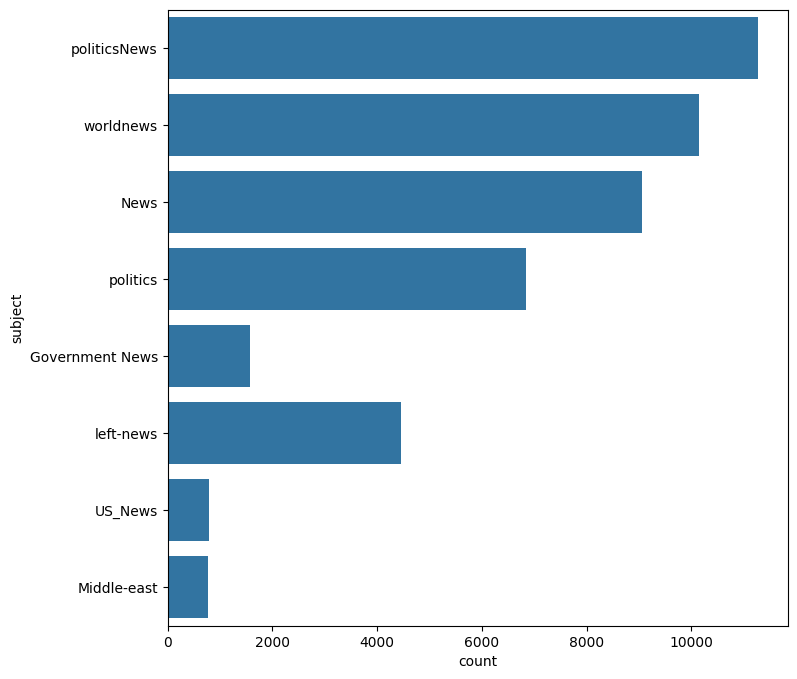

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y = "subject", data = newDf)

<Axes: xlabel='count', ylabel='isFake'>

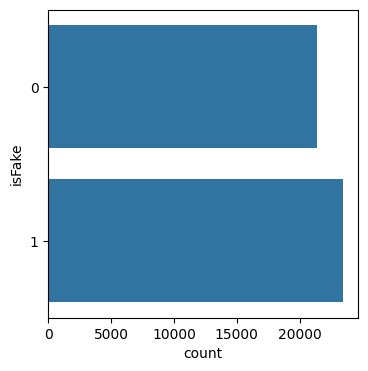

In [ ]:
plt.figure(figsize = (4, 4))
sns.countplot(y = "isFake", data = newDf)

In [ ]:
x = newDf["cleanString"]
y = newDf["isFake"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
vectorization = TfidfVectorizer()

In [ ]:
x_v_train = vectorization.fit_transform(x_train)
x_v_test = vectorization.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**Decision Tree Model**

In [ ]:
DT_model = DecisionTreeClassifier()

In [ ]:
DT_model.fit(x_v_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_DT_model = DT_model.predict(x_v_test)

In [ ]:
DT_model.score(x_v_test, y_test)

0.99456570155902

In [ ]:
print(classification_report(y_test, pred_DT_model))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5396
           1       0.99      1.00      0.99      5829

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



**Logisitic Regression Model**

In [ ]:
LR_model = LogisticRegression()

In [ ]:
LR_model.fit(x_v_train, y_train)

LogisticRegression()

In [ ]:
pred_LR_model = LR_model.predict(x_v_test)

In [ ]:
LR_model.score(x_v_test, y_test)

0.9861024498886414

In [ ]:
if LR_model.score(x_v_test, y_test) > DT_model.score(x_v_test, y_test):
  print("LR Model is Better!")
else:
  print("DR Model is Better!")

DR Model is Better!
